<center><h1><strong>Tarea 1 - Máquinas de Aprendizaje</strong></h1></center>
<center><h3> Juan Pablo Castillo Vera &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 201204595-9 </h3></center>
<center><h3> Álvaro Rodrigo Rojas Valenzuela &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 201073555-9</h3></center>



## 1. Introducción

En la siguiente tarea se realizará un estudio de dos problematicas en las que se intentará modelar una función que permita predecir los valores que se deben obtener de una variable respecto a los que se conoce del comportamiento de esta y otras que pueden estar relacionadas. Con esto se abordaran los siguientes temas: 
1. Manipulación de dataframes en pandas.
2. Estandarización y normalización de datos.
3. Manipulación básica de matrices en numpy.
4. Regresión lineal multivariada usando sklearn.
5. Selección de atributos, from scratch.
6. Regularización (Ridge Regression, Lasso) usando sklearn.
7. Validación cruzada (cross-validation) usando sklearn.


## 2. Desarrollo

## 2.1 Regresión Lineal Ordinaria (LSS)

En esta sección se trabajará con un pequeño dataset conocido como prostate-cancer, utilizado con frecuencia para realizar pruebas preliminares con métodos de regresión. Los datos vienen de un famoso estudio publicado en 1989 por Tom Stamey, profesor de Urología de la Universidad de Stanford, sobre la eventual correlación entre el nivel de antígeno prostático específico (PSA) medido en un paciente, y una serie de otras mediciones clínicas obtenidas después de practicar al paciente una prostatectomía radical, i.e., extirpación total de la próstata y tejidos circundantes. Una de las variables estudiadas corresponde al volumen de cáncer prostático detectado en el paciente (log transformed).
Para esto se realizaron los siguientes pasos:
### 2.1.a. Construir un dataframe de los datos a analizar.



In [1]:
# REGRESIÓN LINEAL ORDINARIA LSS
# 1.a
import pandas as pd
import numpy as np
url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop('train', axis=1)


Como se puede apreciar en el código anterior, primero se leen los datos de la página y se guardan en una matriz(df). Luego se identifica que datos específicos formaran parte del training set y cuales del testing set. Para esto se lee la última columna de la matriz en donde se impone la clasificación de cada dato y en que set debe formar parte. Se guarda esta información en dos matrices(vectores) booleeanas de 97x1 en donde se informa si el dato i-esimo de la matriz de datos original pertenece o no al set. Cabe destacar que en este proceso la matriz de datos pierde dos columnas, la primera es la de enumeración de los datos(al principio del proceso) y la segunda es la que informa en que set se utiliza el dato, que se elimina luego de creados los vectores aparte con dicha información. 

### 2.1.b. Descripción del dataset.

In [2]:
# 1.b
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


Como se puede observar en los datos entregados, el dataset cuenta de 97 datos con 9 características cada uno. Estas características son valores numéricos, cinco que consideran decimales y cuatro solo valores enteros. Estás son lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45 y lpsa. Se obtienen el promedio, la desviación estandar, el mínimo, el máxino y tres cuartiles. Se observa que existen cuatro atributos que poseen datos con valores negativos, que el atributo más alejado en magnitud de los otros es la edad (age) y el cual posee también la mayor desviación estandar.

### 2.1.c. Normalizar los datos.

In [3]:
# 1.c
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['lpsa'] = df['lpsa']
print df_scaled

      lcavol   lweight       age      lbph       svi       lcp   gleason  \
0  -1.645861 -2.016634 -1.872101 -1.030029 -0.525657 -0.867655 -1.047571   
1  -1.999313 -0.725759 -0.791989 -1.030029 -0.525657 -0.867655 -1.047571   
2  -1.587021 -2.200154  1.368234 -1.030029 -0.525657 -0.867655  0.344407   
3  -2.178174 -0.812191 -0.791989 -1.030029 -0.525657 -0.867655 -1.047571   
4  -0.510513 -0.461218 -0.251933 -1.030029 -0.525657 -0.867655 -1.047571   
5  -2.046706 -0.938806 -1.872101 -1.030029 -0.525657 -0.867655 -1.047571   
6  -0.522668 -0.364678  0.018095  0.356701 -0.525657 -0.867655 -1.047571   
7  -0.560208 -0.209841 -0.791989  0.995291 -0.525657 -0.867655 -1.047571   
8  -1.813627 -0.209841 -2.277143 -1.030029 -0.525657 -0.867655 -1.047571   
9  -0.961052 -0.901927 -0.116919 -1.030029 -0.525657 -0.867655 -1.047571   
10 -0.934188 -0.058200  0.153109 -1.030029 -0.525657 -0.867655 -1.047571   
11 -2.300218 -0.071004 -0.116919  0.808276 -0.525657 -0.867655 -1.047571   
12  0.224659

Se realiza una normalización de datos respecto a la característica "lpsa", y todas las demás se ajustan a esta escala. Es importante normalizar ya que los diferentes magnitudes de los atributos puede provocar que al modelar se consideren unas caracteristicas por sobre otras en el entrenamiento.

### 2.1.d. Regresión Lineal de Mínimos cuadrados.

In [4]:
# 1.d
import sklearn.linear_model as lm
X = df_scaled.ix[:,:-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Para realizar la regresión lineal de mínimos cuadrados primero se ejecutó un paso vital(normalización) que permite que los distintos valores de los atributos tengan un peso adecuado para la representación en la regresión lineal y no exista una variable que por ordenes de magnitud opaque la importancia de las demás. 
Del código se observa que la función que realiza la regresión requiere de los valores de los atributos representados por la matriz X, y el clasificador que son los valores de lpsa representados por el vector y.

### 2.1.e. Construción de Tabla de Pesos y Z-score.

In [5]:
# 1.e
import numpy as np
Naux = Xtrain.shape[0]
xx = Xtrain.as_matrix()
b1 = np.linalg.inv(np.mat(xx.T)*np.mat(xx))
b2 = np.mat(b1)*np.mat(xx.T)
b_hat = np.squeeze(np.asarray(b2.dot(ytrain)))
yhat_train = linreg.predict(Xtrain)
mse_train = np.mean(np.power(yhat_train - ytrain, 2))
mse_aux = Naux*mse_train
sigmaCuad = mse_aux/(Naux-Xtrain.shape[1]-1)
diag = np.diag(b1)
#correlation = []

z_score = []
for j in range(0, Xtrain.shape[1]):
    z_score.append(b_hat[j]/(np.power(sigmaCuad*diag[j],0.5)))
    #correlation.append(np.corrcoef(Xtrain[j,:],ytrain))
    
print '\nPesos y Z-score de cada predictor:'
print '\nAtributo    Peso   Z-Score'
print 'lcavol    %f'%b_hat[0]+' %f'%z_score[0]+'\nlweight   %f'%b_hat[1]+' %f'%z_score[1]+'\nage      %f'%b_hat[2]+' %f'%z_score[2]
print 'lbph      %f'%b_hat[3]+' %f'%z_score[3]+'\nsvi       %f'%b_hat[4]+' %f'%z_score[4]+'\nlcp      %f'%b_hat[5]+' %f'%z_score[5]
print 'gleason  %f'%b_hat[6]+' %f'%z_score[6]+'\npgg45     %f'%b_hat[7]+' %f'%z_score[7]+'\nIntercept %f'%b_hat[8]+' %f'%z_score[8]


Pesos y Z-score de cada predictor:

Atributo    Peso   Z-Score
lcavol    0.676016 5.319828
lweight   0.261694 2.726973
age      -0.140734 -1.383823
lbph      0.209061 2.038046
svi       0.303623 2.447876
lcp      -0.287002 -1.850749
gleason  -0.021195 -0.145411
pgg45     0.265576 1.722793
Intercept 2.464933 27.359253


Para obtener los z-score de la tabla se divide una chi cuadrado por una normal, lo que equivale a una t-student. La que se utilizó es una con grados de libertad igual a: 58 (número de datos del dataset - número de atributos -1). Considerando un 5% de significancia. Por lo que una cola de 0,025 cuantiles de la distribución t67-9 entrega el intervalo [-2.002 , 2.002].

Considerando lo anterior, y como se aprecia en la tabla obtenida, el atributo con mayor correlación es lcavol(0.676016), lo que la hace la variable con mayor correlación con la respuesta. A esta le siguen svi(0.303623) y lweight(0.261694). 

Por el otro lado, tenemos que aquellos predictores con un Z-score absoluto menor a 2.002 no tienen la suficiente relación con los datos de salida, es decir, los predictores age(-1.383823), lcp(-1.850749), gleason(-0.145411) y pgg45(1.722793) no son significantes.


### 2.1.f. Estimación del error del modelo.

In [6]:
# 1.f
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
print 'El error de predición real usando el test_set es %f'%mse_test
from sklearn import cross_validation
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

k_fold = cross_validation.KFold(len(Xm),5)
mse_cv = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 5
print 'El error de prediccion usando CV con K=5 es %f'%mse_cv

k_fold = cross_validation.KFold(len(Xm),10)
mse_cv = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10
print 'El error de prediccion usando CV con K=10 es %f'%mse_cv


El error de predición real usando el test_set es 0.521274
El error de prediccion usando CV con K=5 es 0.956515
El error de prediccion usando CV con K=10 es 0.757237


Ya que con k=5 se utiliza en cada iteración un 80% de los datos para entrenar y 20% para validar ,en contraste con el 90% de datos de entranimiento y 10% de datos de validación de k=10. Es intuitivo pensar que si se entrena con mas datos y valida con menos, el error será menor, pero esto a costa de arriesgarse a un mayor sobreajuste al entrenamiento. 

Al apreciar también el error real respecto a los de predición de cross-validation se observa que los resultados obtenidos no son del todo buenos para este grupo de datos, obteniendose un error mucho mayor al obtenido con una regresión lineal.

### 2.1.j. Estimación del error de cada dato de entrenamiento.

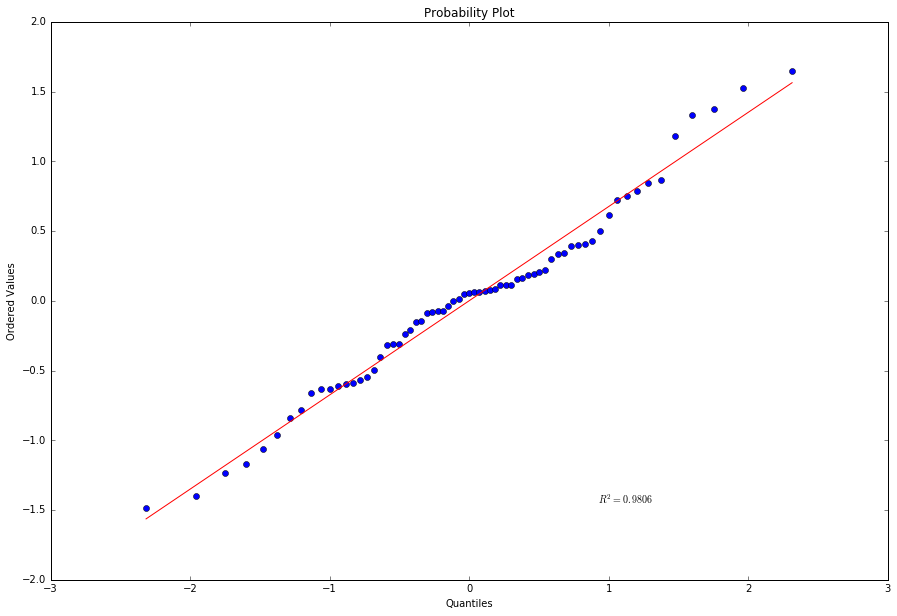

In [7]:
# 1.j
import pylab
import scipy.stats as stats
%matplotlib inline
pylab.figure(figsize=(15,10))
errors = yhat_train - ytrain
stats.probplot(errors,dist="norm",plot=pylab)
pylab.show()

Considerando que los errores de predicción se calculan como la distancia de cada dato real con la estimación realizada, se puede afirmar que existe una correlación entre las variables y el resultado que se busca, además se logra comprobar que considerar la hipótesis de normalidad es acertada.

## 2.2 Selección de Atributos

Para el desarrollo realizado a continuaciòn se utilizó el mismo dataframe anterior.

### 2.2.a Construcción de Forward Step-wise Selection (FSS)

selected= Lcavol...
totalvars=2, mse = 0.664606
selected= Lweight...
totalvars=3, mse = 0.553610
selected= Svi...
totalvars=4, mse = 0.521011
selected= Lbph...
totalvars=5, mse = 0.489776
selected= Pgg45...
totalvars=6, mse = 0.478648
selected= Gleason...
totalvars=7, mse = 0.477653
selected= Age...
totalvars=8, mse = 0.465592
selected= Lcp...
totalvars=9, mse = 0.439200


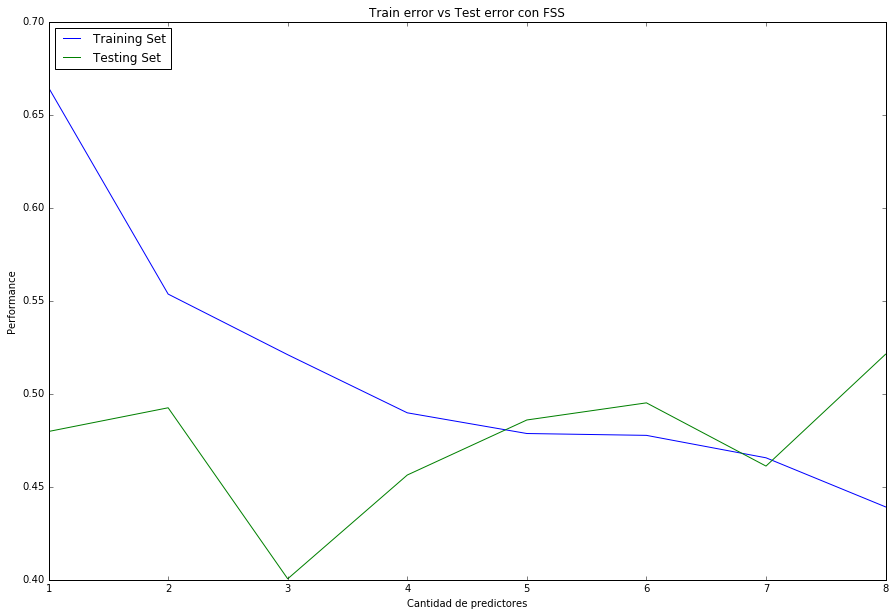

In [8]:
# SELECCIÓN DE ATRIBUTOS
# 2.a
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(15,10))

def fss(x, y, names_x, test_data, k=10000):
    p = x.shape[1] - 1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    training_error = []
    test_error = []
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected) <= k:
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            X_train = x[:, indexes]
            model.fit(X_train, y)
            predicted_value_train = model.predict(X_train)
            residual_value_train = predicted_value_train - y
            X_test, y_test = test_data
            X_test = X_test[:, indexes]
            predicted_value_test = model.predict(X_test)
            residual_value_test = predicted_value_test - y_test
            mse_train = np.mean(np.power(residual_value_train, 2))
            mse_test = np.mean(np.power(residual_value_test, 2))
            var = (mse_train * X_train.shape[0]) / (X_train.shape[0] - X_train.shape[1] - 1)
            diag_values = np.diag(np.linalg.pinv(np.dot(X_train.T, X_train)))
            z_score = np.divide(model.coef_, np.sqrt(np.multiply(var, diag_values)))
            z_score_candidate = z_score[-1]
            score_candidates.append((z_score_candidate, mse_train, mse_test, candidate))
        score_candidates.sort()
        z_score, best_new_score_, mse_test_, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        training_error.append((len(selected), best_new_score_))
        test_error.append((len(selected), mse_test_))
        print "selected= %s..." % names_x[best_candidate]
        print "totalvars=%d, mse = %f" % (len(indexes), best_new_score_)
    return selected, training_error, test_error

X = df_scaled.ix[:, :-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xm_train = Xtrain.as_matrix()
ym_train = ytrain.as_matrix()
Xm_test = Xtest.as_matrix()
ym_test = ytest.as_matrix()

names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
selected, points_training, points_test = fss(Xm_train, ym_train, names_regressors, (Xm_test, ym_test))
x_test= []
y_test= []
for x in points_test:
    x_test.append(x[0]-1)
    y_test.append(x[1])
x_train=[]
y_train=[]
for x in points_training:
    x_train.append(x[0]-1)
    y_train.append(x[1])
plt.plot(x_train, y_train, label='Training Set')
plt.plot(x_test, y_test, label='Testing Set')
plt.xlim(min(x_train), max(x_train))
plt.legend()
plt.xlabel('Cantidad de predictores')
plt.ylabel('Performance')
plt.title('Train error vs Test error con FSS')
plt.legend(loc=2)
plt.show()

Para la selección de atributos se realizó primero un FSS en donde los atributos eran escogidos según el que generara un menor error al incorporarlo a los atributos ya considerados utilizando como método de cálculo del error los z-score.

Se puede observar del gráfico que a medida que se agregan mayor cantidad de variables el error del training set disminuye hasta aun mínimo al considerar todas los atributos. Esto era esperable, y se sabe que considerar todas las variables fomenta el overfitting a los datos de entrenamiento. Es por esto que se analizan los errores de prueba, en estos se obtuvo diferentes valores sin seguir un patrón marcado en cada iteración, siendo el menor error de test al alcanzar 3 variables (Lcavol,Lweight,Svi).

### 2.2.b Construcción de Backward Step-wise Selection (BSS)

selected = Gleason...
totalvars = 9, mse = 0.439200
selected = Age...
totalvars = 8, mse = 0.439363
selected = Lcp...
totalvars = 7, mse = 0.455818
selected = Pgg45...
totalvars = 6, mse = 0.478648
selected = Lbph...
totalvars = 5, mse = 0.489776
selected = Svi...
totalvars = 4, mse = 0.521011
selected = Lweight...
totalvars = 3, mse = 0.553610
selected = Lcavol...
totalvars = 2, mse = 0.664606


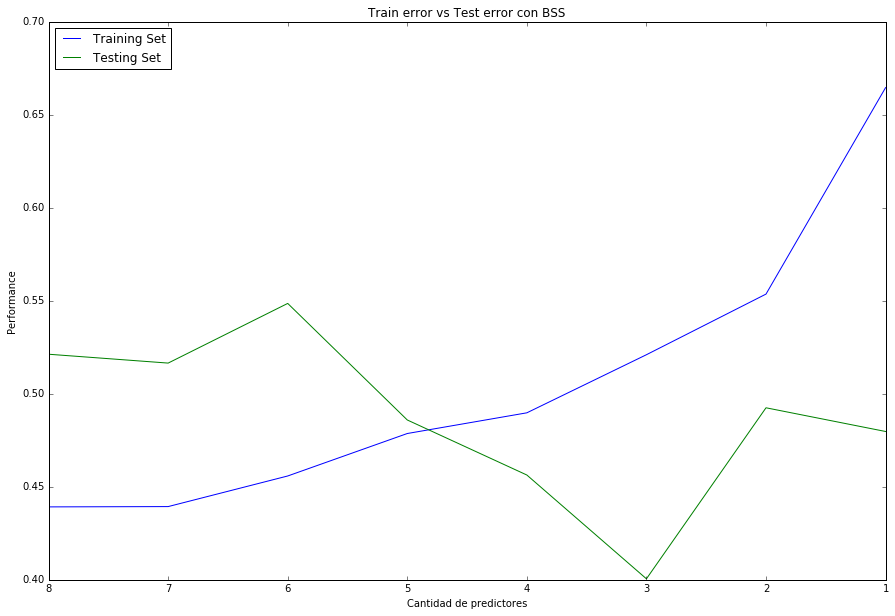

In [9]:
# 2.b
%matplotlib inline
plt.figure(figsize=(15,10))

def bss(x, y, names_x, test_data, k=10000):
    p = x.shape[1] - 1
    k = min(p, k)
    names_x = np.array(names_x)
    selected = range(0, p)
    removed = []
    points_training = []
    points_test = []
    while len(selected) >= 1:        
        model = lm.LinearRegression(fit_intercept=False)
        indexes = selected + [p]
        X_train = x[:, indexes]
        model.fit(X_train, y)
        predicted_value_train = model.predict(X_train)
        residual_value_train = predicted_value_train - y
        X_test, y_test = test_data
        X_test = X_test[:, indexes]
        predicted_value_test = model.predict(X_test)
        residual_value_test = predicted_value_test - y_test
        mse_train = np.mean(np.power(residual_value_train, 2))
        mse_test = np.mean(np.power(residual_value_test, 2))
        var = (mse_train * X_train.shape[0]) / (X_train.shape[0] - X_train.shape[1] - 1)
        diag_values = np.diag(np.linalg.pinv(np.dot(X_train.T, X_train)))
        z_score = np.divide(model.coef_, np.sqrt(np.multiply(var, diag_values)))
        score_candidates = zip(np.abs(z_score), indexes)
        score_candidates.sort(reverse=True)
        worst_new_z_score, worst_candidate = score_candidates.pop()
        selected.remove(worst_candidate)
        removed.append(worst_candidate)
        points_training.append((len(indexes), mse_train))
        points_test.append((len(indexes), mse_test))
        print "selected = %s..." % names_x[worst_candidate]
        print "totalvars = %d, mse = %f" % (len(indexes), mse_train)
    return removed, points_training, points_test

X = df_scaled.ix[:, :-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xm_train = Xtrain.as_matrix()
ym_train = ytrain.as_matrix()
Xm_test = Xtest.as_matrix()
ym_test = ytest.as_matrix()

removed, points_training, points_test = bss(Xm_train, ym_train, names_regressors, (Xm_test, ym_test))
x_test= []
y_test= []
for x in points_test:
    x_test.append(x[0]-1)
    y_test.append(x[1])
x_train=[]
y_train=[]
for x in points_training:
    x_train.append(x[0]-1)
    y_train.append(x[1])
plt.plot(x_train, y_train, label='Training Set')
plt.plot(x_test, y_test, label='Testing Set')
plt.xlim(max(x_train), min(x_train))
plt.legend()
plt.xlabel('Cantidad de predictores')
plt.ylabel('Performance')
plt.title('Train error vs Test error con BSS')
plt.legend(loc=2)
plt.show()

Como era de esperar, el gráfico obtenido con BSS es un espejo del que se logró con FSS. Esto debido a que para ambos métodos se utilizó el mismo criterio de error, obteniendose por esto la misma cantidades óptimas de variables para minimizar ambos errores(test = 3 , training = 8).

## 2.3 Regularización

Por último se regularizan los datos reparametrizando los modelos de regresion lineal multivariada con respecto a un alfa alterando los pesos de los predictores y con esto ver si el modelo mejora su precisión. 

### 2.3.a Regularizando con norma l2 (Ridge Regression)

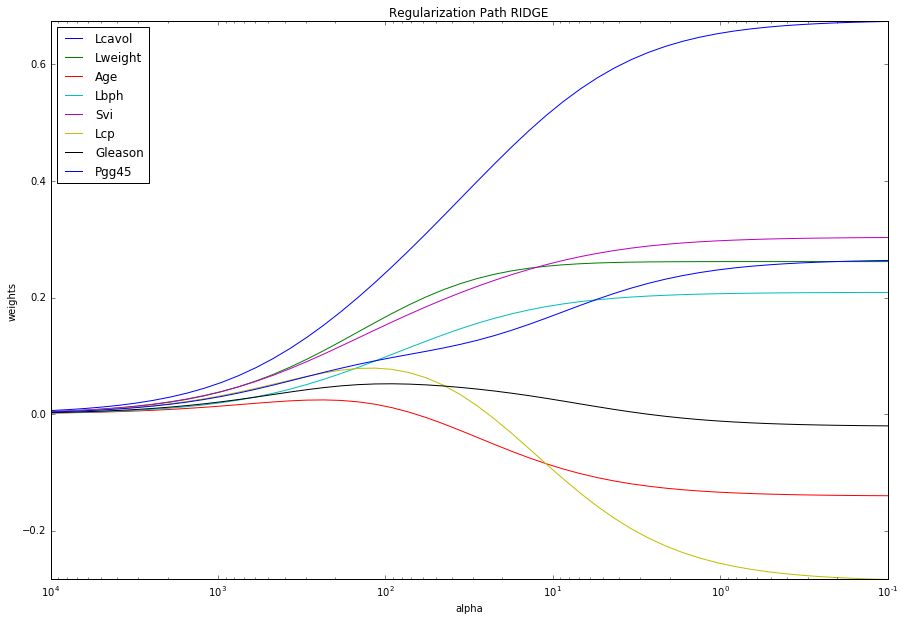

In [10]:
# REGULARIZACIÓN
# 3.a
%matplotlib inline
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
plt.figure(figsize=(15,10))
Xr = X
Xr = Xr.drop('intercept', axis=1)
Xtrain = Xr[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
        model.set_params(alpha=a)
        model.fit(Xtrain, ytrain)
        coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
        alphas_.shape
        y_arr.shape
        plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Se puede observar de la regularización con Ridge Regression, que las variables sufren una penalización paulatina respecto a la importancia/influencia a medida que el valor de alfa aumenta. En el gráfico además, se puede observar que el atributo "Lcavol" es el de mayor importacia, ya que se requiere que alfa se acerque a 10000 para que la variable deje de ser significativa.

Respecto a las otras variables, estas tienen menor importancia para el modelo, asi que la penalizacion es menor a medida que aumenta alfa, pero aún así alcanzan un peso cercano a 0 mas rápidamente que Lcavol. Como por ejemplo la variable Gleasson, que con un alfa igual a 100 ya dejó de tener influencia para el modelo.


### 2.3.b Regularizando con norma l1 (Lasso)

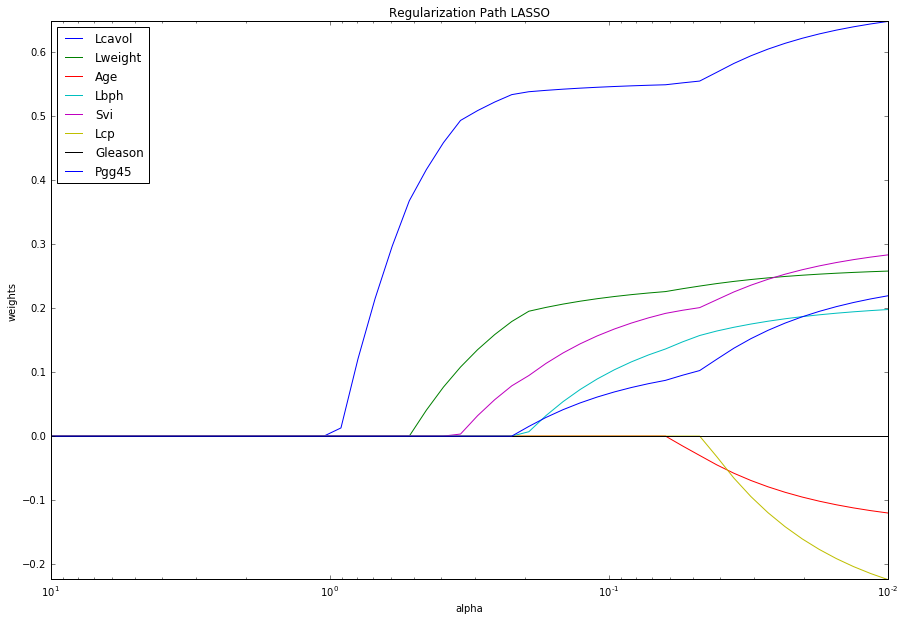

In [11]:
# 3.b
%matplotlib inline
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
plt.figure(figsize=(15,10))
Xl = X
Xl = Xl.drop('intercept', axis=1)
Xtrain = Xl[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(1,-2,base=10)
coefs = []
clf = Lasso(fit_intercept=True)
for a in alphas_:
        clf.set_params(alpha=a)
        clf.fit(Xtrain, ytrain)
        coefs.append(clf.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
        alphas_.shape
        y_arr.shape
        plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Utilizando regularizacion con Lasso se observa que existe un ranking de importancia similar en comparación a lo obtenido de las variables en la parte anterior, pero estás disminuyen sus pesos de una forma más brusca o acelerada, de hecho para todos los atributos la velocidad de cambio de la penalizacion es mucho mayor a medida que aumenta el valor de alfa. Cuando alfa tiene un valor de 1, ya todas las variables tienen una infima importancia para el modelo, que se expresa en los pesos cercanos a 0.

Puede verse que con Lasso la selección de atributos es más notoria a medida que se penaliza, por lo tanto seleccionar atributos utilizando Lasso es bastante efectivo en la practica.


### 2.3.c Errores de entrenamiento y pruebas (Ridge Regression)

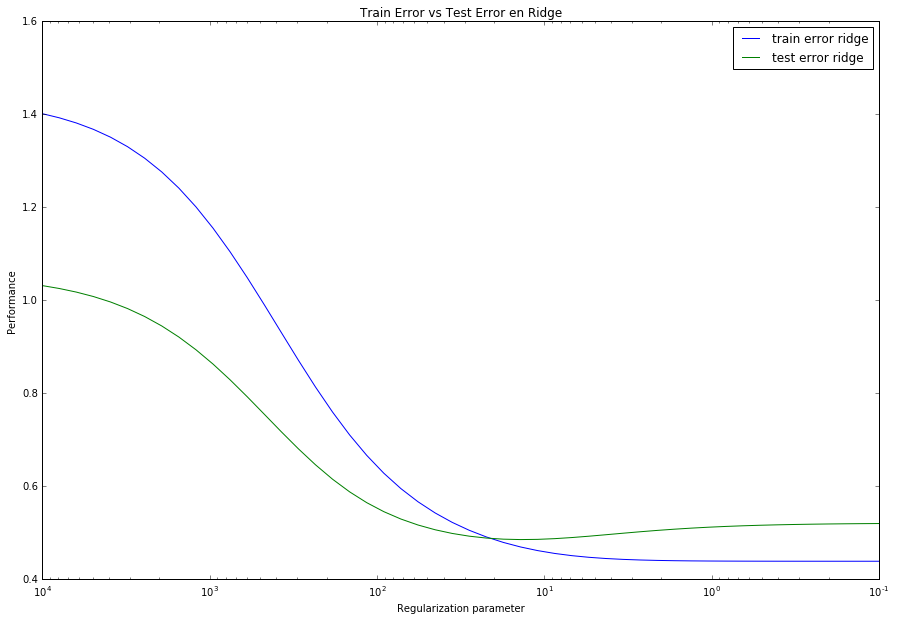

In [12]:
# 3.c
%matplotlib inline
plt.figure(figsize=(15,10))
Xtest = Xl[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
        model.set_params(alpha=a)
        model.fit(Xtrain, ytrain)
        yhat_train = model.predict(Xtrain)
        yhat_test = model.predict(Xtest)
        mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
        mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en Ridge')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Observando el grafico de train error y test error, se tiene que cuando alfa es muy pequeño (menor a 1), los errores son constantes, y el error de prueba es mayor que el de entrenamiento. Pero a medida que nos acercamos a alfa igual a 1 el test error comienza a disminuir y el train error aumentar de a poco.

Para cuando alfa es mayor a 1, el test error disminuye hasta que alfa tiene una magnitud aproximada de 10, posterior a esto el test error se dispara. Respecto al train error, cuando alfa es mayor a 1 este tambien se aumenta indefinidamente, pero lo hace de una forma más drastica. Todo esto ocurre porque las variables pierden su importancia, por lo que penalizar demasiado a las variables es contraproducente para el modelo, para este caso en particular lo mejor fue aplicar un alfa cercano a 10 para disminuir el test error.

### 2.3.d Errores de entrenamiento y pruebas (Lasso)

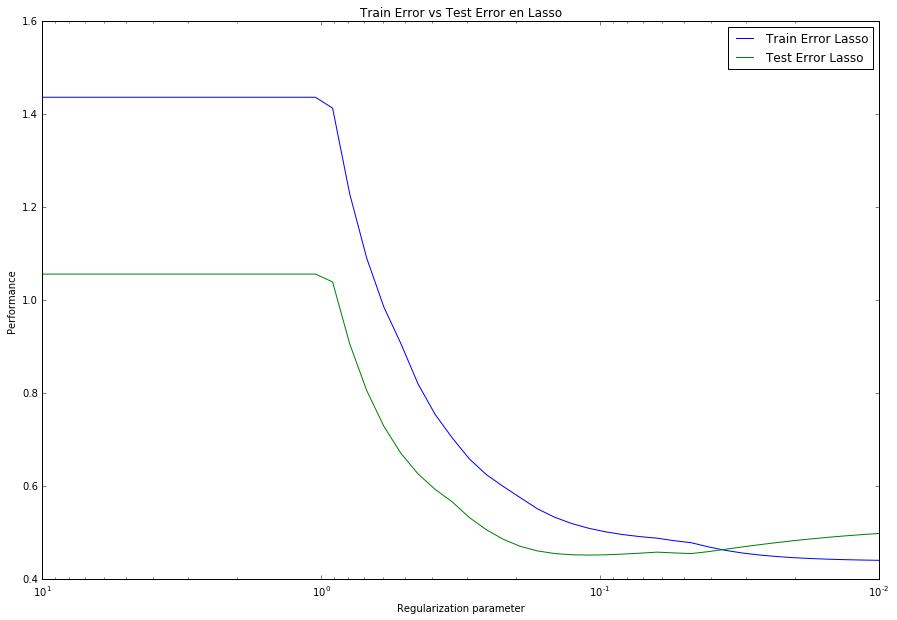

In [13]:
# 3.d
%matplotlib inline
plt.figure(figsize=(15,10))
alphas_ = np.logspace(1,-2,base=10)
coefs = []
clf2 = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    clf2.set_params(alpha=a)
    clf2.fit(Xtrain, ytrain)
    yhat_train = clf2.predict(Xtrain)
    yhat_test = clf2.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='Train Error Lasso')
ax.plot(alphas_,mse_test,label='Test Error Lasso')
plt.legend(loc=1)
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.title('Train Error vs Test Error en Lasso')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Como se puede observar del grafico de los errores utilizando lasso, solo cuando alfa es menor a 1, el error varia. Así se puede apreciar que entre alfa= 0.01 y alfa=0.1 se tiene los menores errores tanto de entrenamiento como de prueba. 
Lasso pierde su utilidad cuando este sobrepasa al valor 1 en su alfa, debido que ya castigo a todos los pesos de las variables predictoras, por ende, los errores aumentan y quedan constantes en su máximo.


### 2.3.e Estimación de los parámetros de regularización con CV

In [14]:
# 3.e
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))

alphas_ = np.logspace(4,-1,base=10)
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
        model.set_params(alpha=a)
        mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                                        for train, val in k_fold]
        if np.mean(mse_list_k10) < best_cv_mse:
                best_cv_mse = np.mean(mse_list_k10)
                best_alpha = a
                print "RIDGE: BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

print ''                
alphas_ = np.logspace(1,-2,base=10)                
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
for a in alphas_:
        model.set_params(alpha=a)
        mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
                                        for train, val in k_fold]
        if np.mean(mse_list_k10) < best_cv_mse:
                best_cv_mse = np.mean(mse_list_k10)
                best_alpha = a
                print "LASSO: BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

RIDGE: BEST PARAMETER=10000.000000, MSE(CV)=1.764186
RIDGE: BEST PARAMETER=7906.043211, MSE(CV)=1.756164
RIDGE: BEST PARAMETER=6250.551925, MSE(CV)=1.746186
RIDGE: BEST PARAMETER=4941.713361, MSE(CV)=1.733831
RIDGE: BEST PARAMETER=3906.939937, MSE(CV)=1.718613
RIDGE: BEST PARAMETER=3088.843596, MSE(CV)=1.699994
RIDGE: BEST PARAMETER=2442.053095, MSE(CV)=1.677395
RIDGE: BEST PARAMETER=1930.697729, MSE(CV)=1.650239
RIDGE: BEST PARAMETER=1526.417967, MSE(CV)=1.617994
RIDGE: BEST PARAMETER=1206.792641, MSE(CV)=1.580254
RIDGE: BEST PARAMETER=954.095476, MSE(CV)=1.536822
RIDGE: BEST PARAMETER=754.312006, MSE(CV)=1.487816
RIDGE: BEST PARAMETER=596.362332, MSE(CV)=1.433749
RIDGE: BEST PARAMETER=471.486636, MSE(CV)=1.375573
RIDGE: BEST PARAMETER=372.759372, MSE(CV)=1.314656
RIDGE: BEST PARAMETER=294.705170, MSE(CV)=1.252671
RIDGE: BEST PARAMETER=232.995181, MSE(CV)=1.191415
RIDGE: BEST PARAMETER=184.206997, MSE(CV)=1.132579
RIDGE: BEST PARAMETER=145.634848, MSE(CV)=1.077554
RIDGE: BEST PARAMETE

Al iterar con varios valores de alfa para cada método y obteniendo el mejor valor de mse realizando CV con 10 folds se puede observar que ambos métodos utilizando diferentes orden de magnitud para sus alphas, mientras que en ridge se utilizaron valores entre 2 y 10000 obteniendose valores de mse entre 0.75 y 1.77, lasso varia sus valores de alpha entre 0.01 y 0.9(10) obteniendo mse que van desde los 0.75 hasta los 1.78(1.80). De estos valores se puede dar cuenta de que los mse van variando muy similar entre ridge y lasso, aunque sean calculados a partir de parametros muy distintos.


## 2.4 Predicción de Utilidades de Películas

El problema a resolver en esta sección consiste en predecir el volumen de utilidades (en dólares) obtenidas por el estreno (al público, en USA) de una película. Específicamente consideraremos dos posibles respuestas: el volumen total de utilidades (total revenue) obtenido durante el fin de semana del estreno y el volumen de utilidades por lugar de proyección (per screen revenue). Los datos a utilizar fueron recolectados en un estudio publicado recientemente por M. Joshi y colegas de la universidad de Carnegie Mellon, y corresponden a 1718 películas realizadas entre 2005 y 2009. Cada película, se representa utilizando diversos tipos de atributos:

1. Texto: A partir de las críticas publicadas para cada película (en diversos sitios y antes del estreno), se construyen características que corresponden a la frecuencia de palabras, parejas de palabras y tríos de palabras obtenidas de un vocabulario.
2. Metadata: (1) Variable binaria que indica si el lugar de origen de la película es USA, (2) logaritmo del presupuesto, (3) número de puntos de proyección, (4) género (acción, drama, comedia, etc), (5) Calificación de la MPAA (mayores de catorce, todo espectador, etc), (6) Variable binaria que ndica si el estreno se produjo durante un feriado/vacaciones y (7) Número de actores con OSCAR.


### 2.4.a Lectura y Carga de datos

In [15]:
# 4.a
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.io import mmread
Xtrain = csr_matrix(mmread('train.x.mm'))
ytrain = np.loadtxt('train.y.dat')
Xtest = csr_matrix(mmread('test.x.mm'))
ytest = np.loadtxt('test.y.dat')
Xdev = csr_matrix(mmread('dev.x.mm'))
ydev = np.loadtxt('dev.y.dat')

Se lee los datos de los archivos ya descargados y se almacenan en los vectores/matrices Xtrain, ytrain, Xtest, ytest, Xdec, ydev.

### 2.4.b Construcción del Modelo Lineal
#### 2.4.b.1 Construcción con regresión con reparametrización Ridge

R2=0.515260 , para alfa=0
R2=0.515283 , para alfa=50
R2=0.515261 , para alfa=100
R2=0.515125 , para alfa=150
R2=0.515124 , para alfa=200
R2=0.515161 , para alfa=250
R2=0.515057 , para alfa=300
R2=0.515103 , para alfa=350
R2=0.514901 , para alfa=400
R2=0.514858 , para alfa=450
R2=0.514920 , para alfa=500
R2=0.514840 , para alfa=550
R2=0.514830 , para alfa=600
R2=0.514757 , para alfa=650
R2=0.514792 , para alfa=700
R2=0.514684 , para alfa=750
R2=0.514642 , para alfa=800
R2=0.514590 , para alfa=850
R2=0.514620 , para alfa=900
R2=0.514658 , para alfa=950
R2=0.514458 , para alfa=1000
MEJOR R2=0.515283 , para alfa=50


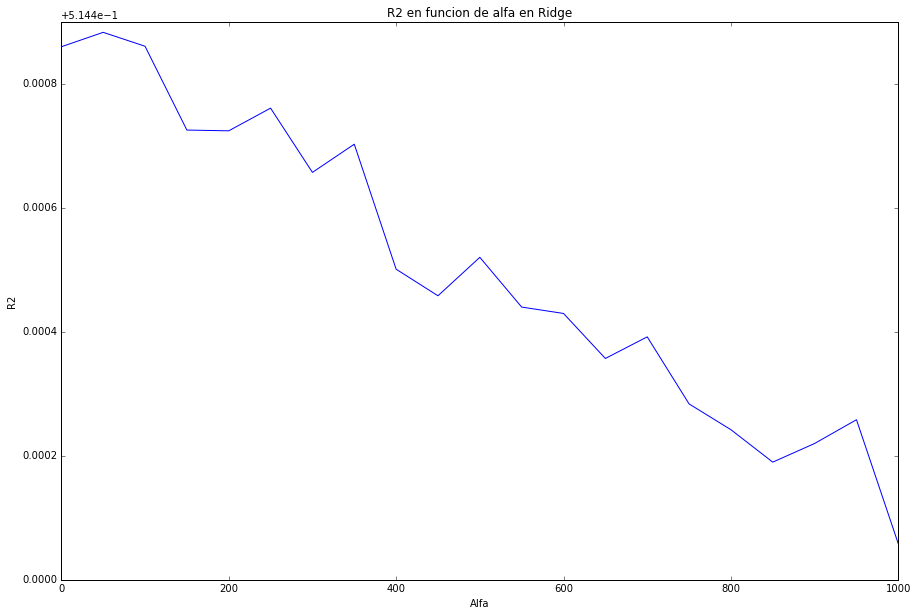

In [16]:
# 4.b Construccion con regresion con reparametrizacion Ridge
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(15,10))

model1 = lm.Ridge(fit_intercept=True)
contador_ridge=0
xr=[]
yr=[]
bestR1= 0
bestalfa1 = 0
while contador_ridge<1001:
    model1.set_params(alpha=contador_ridge, max_iter=1000)
    model1.fit(Xtrain, ytrain)
    print "R2=%f , para alfa=%d" % (model1.score(Xtest, ytest) , contador_ridge) 
    if model1.score(Xtest, ytest) > bestR1:
        bestR1= model1.score(Xtest, ytest)
        bestalfa1= contador_ridge
    xr.append(contador_ridge)
    yr.append(model1.score(Xtest, ytest))
    contador_ridge+=50
print "MEJOR R2=%f , para alfa=%d" % (bestR1, bestalfa1) 
plt.plot(xr, yr, label='R2 en funcion de alpha con reparametrizacion Ridge')
plt.xlabel('Alfa')
plt.ylabel('R2')
plt.title('R2 en funcion de alfa en Ridge')
plt.show()

Se puede observar en el gráfico que no se alcanzan valores de R2 alejados de 0.5145, incluso probando varios valores de alfa que en su recorrido fueron bajando los pesos de importancia a algunos de los atributos.

El mejor valor de R2 obtenido con este método fue 0.515341 , para un alfa de 50.

#### 2.4.b.2 Construcción con regresión con reparametrización Lasso

C:\Users\ralky\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


R2=0.247872 , para alfa=100
R2=0.325019 , para alfa=150
R2=0.365730 , para alfa=200
R2=0.401286 , para alfa=250
R2=0.432394 , para alfa=300
R2=0.456609 , para alfa=350
R2=0.473731 , para alfa=400
R2=0.487556 , para alfa=450
R2=0.501182 , para alfa=500
R2=0.511654 , para alfa=550
R2=0.518742 , para alfa=600
R2=0.529368 , para alfa=650
R2=0.536463 , para alfa=700
R2=0.540826 , para alfa=750
R2=0.542747 , para alfa=800
R2=0.542057 , para alfa=850
R2=0.541753 , para alfa=900
R2=0.541614 , para alfa=950
R2=0.541184 , para alfa=1000
MEJOR R2=0.542747 , para alfa=800


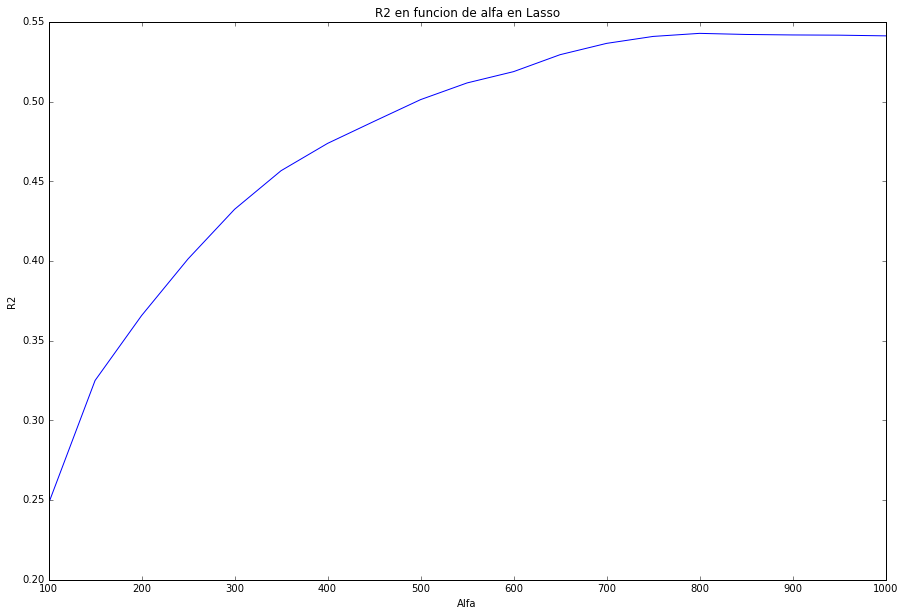

In [17]:
# 4.b Construccion con regresion con reparametrizacion Lasso
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(15,10))

model2 = lm.Lasso(fit_intercept=False)
contador_lasso=100
xl=[]
yl=[]
bestR2= 0
bestalfa2 = 0
# Se calcula un R^2 para distintos valores de alpha
while contador_lasso<1002:
    model2.set_params(alpha=contador_lasso, max_iter=1000)
    model2.fit(Xtrain, ytrain)
    print "R2=%f , para alfa=%d" % (model2.score(Xtest, ytest) , contador_lasso)
    if model2.score(Xtest, ytest) > bestR2:
        bestR2= model2.score(Xtest, ytest)
        bestalfa2= contador_lasso
    xl.append(contador_lasso)
    yl.append(model2.score(Xtest, ytest))
    contador_lasso+=50
print "MEJOR R2=%f , para alfa=%d" % (bestR2, bestalfa2) 
plt.plot(xl, yl, label='R2 en funcion de alpha con reparametrizacion LASSO')
plt.xlabel('Alfa')
plt.ylabel('R2')
plt.title('R2 en funcion de alfa en Lasso')
plt.show()

Se puede observar en el gráfico los valores de R2 aumentan a medida que se incrementa el valor del alfa hasta alcanzar un tope cerca de los 800. Luego, se mantiene casi constante debido a que la mayoría de las variables perdieron significancia.

El mejor valor de R2 obtenido con este método fue 0.542747 , para un alfa de 800.


## 2.5 Comentarios y Reflexiones

Notamos al trabajar los datos que los valores no son ideales en la realidad, requiriendo de trabajo y estandarización para solamente comenzar a analizar y estimar con regresiones. Además, aunque estas regresiones parecen ser viables en algunas situaciones, no se adaptan del todo bien en todos los casos, por lo que hay que probar y experimentar de acuerdo al conocimiento y experticia que se posea de una forma "intuitiva".

Por otra parte siempre existe el mal del sobreajuste, el cual influyó en varias partes del trabajo realizado, producto de este sobreajuste, los errores de los modelos respecto a los datos de prueba eran alejados a los errores con los datos de entrenamiento. Ademas Cross-Validation es una buena medida de ver que tan bueno quedo entrenado el modelo y también para estimar un buen parámetro (alfa) para la reparametrización de los predictores, para asi "castigarlos" de forma debida para mejorar la prediccion del modelo.